In [1]:
import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import datetime, warnings, scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# We have identified the small airlines based on the cutoff <20000 number of flights and the result is 10 airlines
#Frontier, GoJet,Alaska,AirWisconsin,Commute,Hawaiian,Horizon Air,Mesa,Piedmont,Spirit Airlines

In [4]:
# Due to large amount of data we will be loading each airline in a dataframe and performing the EDA

In [5]:
frontier=pd.read_csv('/content/drive/MyDrive/Data/F9.csv')

In [6]:
gojet=pd.read_csv('/content/drive/MyDrive/Data/G7.csv')

In [7]:
alaska=pd.read_csv('/content/drive/MyDrive/Data/AS.csv')

In [8]:
airwis=pd.read_csv('/content/drive/MyDrive/Data/ZW.csv')

In [9]:
commute=pd.read_csv('/content/drive/MyDrive/Data/C5.csv')

In [10]:
hawa=pd.read_csv('/content/drive/MyDrive/Data/HA.csv')

In [11]:
pied=pd.read_csv('/content/drive/MyDrive/Data/PT.csv')

In [12]:
spirit=pd.read_csv('/content/drive/MyDrive/Data/NK.csv')

In [13]:
horizon=pd.read_csv('/content/drive/MyDrive/Data/QX.csv')

In [14]:
mesa=pd.read_csv('/content/drive/MyDrive/Data/YV.csv')

In [15]:
#Merging the dataframes

In [16]:
df=[frontier,gojet,alaska,airwis,commute,hawa,pied,spirit,horizon,mesa]

In [17]:
small_airlines = pd.concat(df, ignore_index=True, sort=False)
small_airlines

,year,month,flightdate,DayOfWeek,DayofMonth,Operating_Airline,OriginCityName,OriginStateName,DestCityName,DestStateName,...,SecurityDelay,LateAircraftDelay,TaxiIn,TaxiOut,WheelsOff,WheelsOn,Origin,Dest,Tail_Number,Description
0,2022,2,2022-02-01,2,1,F9,"Las Vegas, NV",Nevada,"San Diego, CA",California,...,NaN,NaN,5.0,15.0,1807,1857,LAS,SAN,N206FR,Frontier Airlines Inc.
1,2022,2,2022-02-01,2,1,F9,"San Diego, CA",California,"Las Vegas, NV",Nevada,...,NaN,NaN,11.0,18.0,2009,2057,SAN,LAS,N206FR,Frontier Airlines Inc.
2,2022,2,2022-02-01,2,1,F9,"Las Vegas, NV",Nevada,"Orlando, FL",Florida,...,0.0,0.0,12.0,16.0,33,707,LAS,MCO,N206FR,Frontier Airlines Inc.
3,2022,2,2022-02-01,2,1,F9,"Denver, CO",Colorado,"Fort Myers, FL",Florida,...,NaN,NaN,10.0,16.0,55,600,DEN,RSW,N207FR,Frontier Airlines Inc.
4,2022,2,2022-02-01,2,1,F9,"Fort Myers, FL",Florida,"Buffalo, NY",New York,...,NaN,NaN,7.0,24.0,742,1018,RSW,BUF,N207FR,Frontier Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975536,2022,1,2022-01-03,1,3,YV,"Cedar Rapids/Iowa City, IA",Iowa,"Dallas/Fort Worth, TX",Texas,...,0.0,60.0,31.0,13.0,1755,1933,CID,DFW,N957LR,Mesa Airlines Inc.
5975537,2022,1,2022-01-01,6,1,YV,"Dallas/Fort Worth, TX",Texas,"Mobile, AL",Alabama,...,NaN,NaN,3.0,24.0,1802,1909,DFW,MOB,N958LR,Mesa Airlines Inc.
5975538,2022,1,2022-01-02,7,2,YV,"Dallas/Fort Worth, TX",Texas,"Mobile, AL",Alabama,...,0.0,0.0,6.0,18.0,1903,2014,DFW,MOB,N919FJ,Mesa Airlines Inc.
5975539,2022,1,2022-01-01,6,1,YV,"Mobile, AL",Alabama,"Dallas/Fort Worth, TX",Texas,...,NaN,NaN,22.0,9.0,1958,2134,MOB,DFW,N958LR,Mesa Airlines Inc.


In [18]:
small_df = small_airlines[small_airlines['year'] != 2020].copy()

In [19]:
small_df

,year,month,flightdate,DayOfWeek,DayofMonth,Operating_Airline,OriginCityName,OriginStateName,DestCityName,DestStateName,...,SecurityDelay,LateAircraftDelay,TaxiIn,TaxiOut,WheelsOff,WheelsOn,Origin,Dest,Tail_Number,Description
0,2022,2,2022-02-01,2,1,F9,"Las Vegas, NV",Nevada,"San Diego, CA",California,...,NaN,NaN,5.0,15.0,1807,1857,LAS,SAN,N206FR,Frontier Airlines Inc.
1,2022,2,2022-02-01,2,1,F9,"San Diego, CA",California,"Las Vegas, NV",Nevada,...,NaN,NaN,11.0,18.0,2009,2057,SAN,LAS,N206FR,Frontier Airlines Inc.
2,2022,2,2022-02-01,2,1,F9,"Las Vegas, NV",Nevada,"Orlando, FL",Florida,...,0.0,0.0,12.0,16.0,33,707,LAS,MCO,N206FR,Frontier Airlines Inc.
3,2022,2,2022-02-01,2,1,F9,"Denver, CO",Colorado,"Fort Myers, FL",Florida,...,NaN,NaN,10.0,16.0,55,600,DEN,RSW,N207FR,Frontier Airlines Inc.
4,2022,2,2022-02-01,2,1,F9,"Fort Myers, FL",Florida,"Buffalo, NY",New York,...,NaN,NaN,7.0,24.0,742,1018,RSW,BUF,N207FR,Frontier Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975536,2022,1,2022-01-03,1,3,YV,"Cedar Rapids/Iowa City, IA",Iowa,"Dallas/Fort Worth, TX",Texas,...,0.0,60.0,31.0,13.0,1755,1933,CID,DFW,N957LR,Mesa Airlines Inc.
5975537,2022,1,2022-01-01,6,1,YV,"Dallas/Fort Worth, TX",Texas,"Mobile, AL",Alabama,...,NaN,NaN,3.0,24.0,1802,1909,DFW,MOB,N958LR,Mesa Airlines Inc.
5975538,2022,1,2022-01-02,7,2,YV,"Dallas/Fort Worth, TX",Texas,"Mobile, AL",Alabama,...,0.0,0.0,6.0,18.0,1903,2014,DFW,MOB,N919FJ,Mesa Airlines Inc.
5975539,2022,1,2022-01-01,6,1,YV,"Mobile, AL",Alabama,"Dallas/Fort Worth, TX",Texas,...,NaN,NaN,22.0,9.0,1958,2134,MOB,DFW,N958LR,Mesa Airlines Inc.


In [20]:
small_df['CarrierDelay'].fillna(0, inplace=True)
small_df['WeatherDelay'].fillna(0, inplace=True)
small_df['NASDelay'].fillna(0, inplace=True)
small_df['SecurityDelay'].fillna(0, inplace=True)
small_df['LateAircraftDelay'].fillna(0, inplace=True)

In [21]:
small_df.drop(['flightdate','Description','DepTime','DepDelay','DepDel15','ArrTime','ArrDelay','ArrDelayMinutes','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','year','WheelsOff','WheelsOn'],axis=1,inplace=True)

In [22]:
small_df.isna().sum()

month                0
DayOfWeek            0
DayofMonth           0
Operating_Airline    0
OriginCityName       0
OriginStateName      0
DestCityName         0
DestStateName        0
DepDelayMinutes      0
ArrDel15             0
CRSDepTime           0
CRSArrTime           0
Distance             0
LateAircraftDelay    0
TaxiIn               0
TaxiOut              0
Origin               0
Dest                 0
Tail_Number          0
dtype: int64

In [23]:
small_df['CRSArrTime'] = np.ceil(small_df['CRSArrTime']/600).apply(int)
small_df['CRSDepTime'] = np.ceil(small_df['CRSDepTime']/600).apply(int)
#small_df['WheelsOff'] = np.ceil(small_df['WheelsOff']/600).apply(int)
#small_df['WheelsOn'] = np.ceil(small_df['WheelsOn']/600).apply(int)

In [24]:
#Identifying the number of categorical variables in dataset
numerical_variables =  list(small_df.select_dtypes(include=['int64','float64']).drop('ArrDel15', axis=1).columns)
categorical_variables =  list(small_df.select_dtypes(include=['object']).columns)

In [25]:
df_numericals = small_df[numerical_variables]
df_numericals.head()

,month,DayOfWeek,DayofMonth,DepDelayMinutes,CRSDepTime,CRSArrTime,Distance,LateAircraftDelay,TaxiIn,TaxiOut
0,2,2,1,0.0,3,4,50.0,0.0,5.0,15.0
1,2,2,1,0.0,4,4,48.0,0.0,11.0,18.0
2,2,2,1,90.0,4,2,214.0,0.0,12.0,16.0
3,2,2,1,19.0,1,1,185.0,0.0,10.0,16.0
4,2,2,1,0.0,2,2,156.0,0.0,7.0,24.0


In [26]:
numerical_variables

['month',
 'DayOfWeek',
 'DayofMonth',
 'DepDelayMinutes',
 'CRSDepTime',
 'CRSArrTime',
 'Distance',
 'LateAircraftDelay',
 'TaxiIn',
 'TaxiOut']

<Axes: >

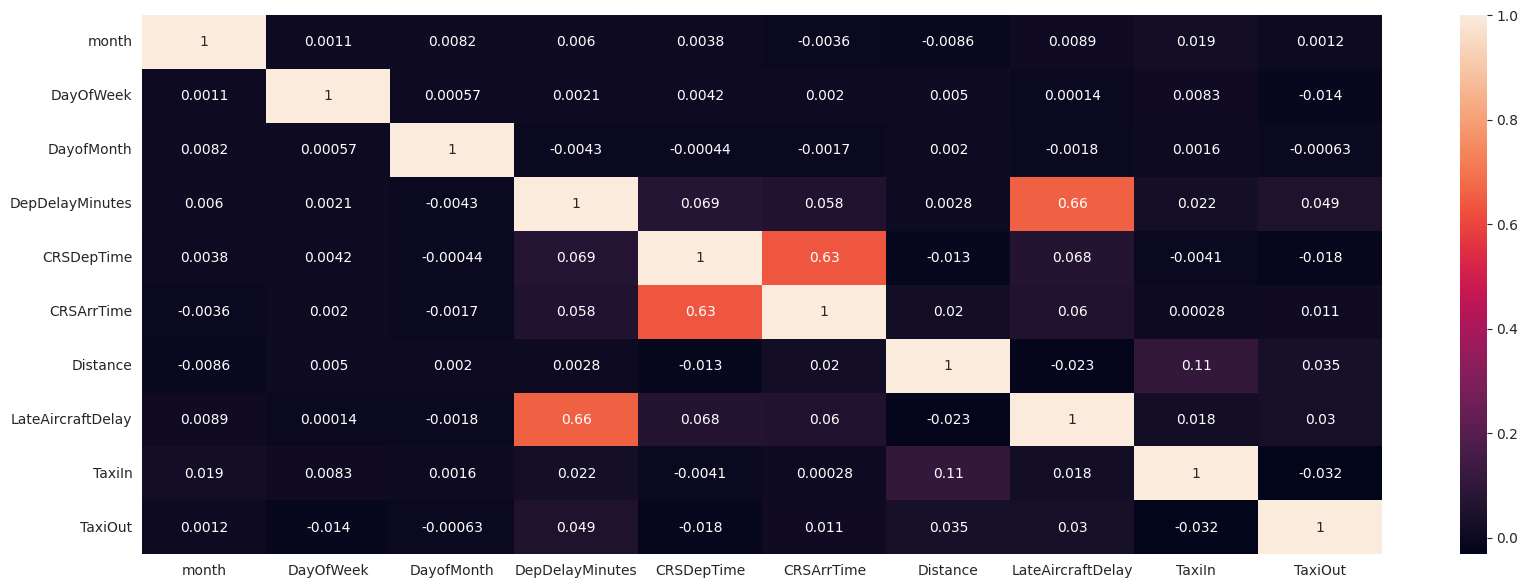

In [27]:
#Finding the correlation between numerical features
## Checking for correlation
cor_mat=df_numericals.corr()
fig = plt.figure(figsize=(20,7))
sns.heatmap(cor_mat,annot=True)

In [28]:
df_categorical = small_df[categorical_variables]
df_categorical.head()

,Operating_Airline,OriginCityName,OriginStateName,DestCityName,DestStateName,Origin,Dest,Tail_Number
0,F9,"Las Vegas, NV",Nevada,"San Diego, CA",California,LAS,SAN,N206FR
1,F9,"San Diego, CA",California,"Las Vegas, NV",Nevada,SAN,LAS,N206FR
2,F9,"Las Vegas, NV",Nevada,"Orlando, FL",Florida,LAS,MCO,N206FR
3,F9,"Denver, CO",Colorado,"Fort Myers, FL",Florida,DEN,RSW,N207FR
4,F9,"Fort Myers, FL",Florida,"Buffalo, NY",New York,RSW,BUF,N207FR


In [29]:
#precovid.CRSArrTime.value_counts(normalize=True)
small_df.CRSArrTime.value_counts(normalize=True)

3    0.359836
4    0.326717
2    0.282671
1    0.030776
Name: CRSArrTime, dtype: float64

In [30]:
#precovid.CRSDepTime.value_counts(normalize=True)
small_df.CRSDepTime.value_counts(normalize=True)

2    0.369191
3    0.362806
4    0.219265
1    0.048738
Name: CRSDepTime, dtype: float64

In [31]:
X = small_df.drop(['ArrDel15'], axis = 1)
X.shape

(5182334, 18)

In [32]:
# Dropping "index" column
X.reset_index(inplace = True)
X = X.drop(columns = ['index'])

In [33]:
X

,month,DayOfWeek,DayofMonth,Operating_Airline,OriginCityName,OriginStateName,DestCityName,DestStateName,DepDelayMinutes,CRSDepTime,CRSArrTime,Distance,LateAircraftDelay,TaxiIn,TaxiOut,Origin,Dest,Tail_Number
0,2,2,1,F9,"Las Vegas, NV",Nevada,"San Diego, CA",California,0.0,3,4,50.0,0.0,5.0,15.0,LAS,SAN,N206FR
1,2,2,1,F9,"San Diego, CA",California,"Las Vegas, NV",Nevada,0.0,4,4,48.0,0.0,11.0,18.0,SAN,LAS,N206FR
2,2,2,1,F9,"Las Vegas, NV",Nevada,"Orlando, FL",Florida,90.0,4,2,214.0,0.0,12.0,16.0,LAS,MCO,N206FR
3,2,2,1,F9,"Denver, CO",Colorado,"Fort Myers, FL",Florida,19.0,1,1,185.0,0.0,10.0,16.0,DEN,RSW,N207FR
4,2,2,1,F9,"Fort Myers, FL",Florida,"Buffalo, NY",New York,0.0,2,2,156.0,0.0,7.0,24.0,RSW,BUF,N207FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5182329,1,1,3,YV,"Cedar Rapids/Iowa City, IA",Iowa,"Dallas/Fort Worth, TX",Texas,81.0,3,4,98.0,60.0,31.0,13.0,CID,DFW,N957LR
5182330,1,6,1,YV,"Dallas/Fort Worth, TX",Texas,"Mobile, AL",Alabama,0.0,3,4,67.0,0.0,3.0,24.0,DFW,MOB,N958LR
5182331,1,7,2,YV,"Dallas/Fort Worth, TX",Texas,"Mobile, AL",Alabama,65.0,3,4,71.0,0.0,6.0,18.0,DFW,MOB,N919FJ
5182332,1,6,1,YV,"Mobile, AL",Alabama,"Dallas/Fort Worth, TX",Texas,4.0,4,4,96.0,0.0,22.0,9.0,MOB,DFW,N958LR


In [34]:
y = small_df['ArrDel15']
y.head(20)

0     0.0
1     0.0
2     1.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: ArrDel15, dtype: float64

In [35]:
# Perform the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [36]:
# Calculate class frequencies
class_freq = np.bincount(y_train)
print("Class frequencies:", class_freq)

Class frequencies: [3303048  842819]


In [37]:
# Calculate class weights
class_weights = len(y_train) / (2 * class_freq)
class_weights = dict(zip([0, 1], class_weights))
print("Class weights:", class_weights)

Class weights: {0: 0.6275820091018962, 1: 2.4595239309982335}


In [38]:
pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [39]:
from catboost import CatBoostClassifier

In [40]:
cat_model = CatBoostClassifier(iterations=100, cat_features=categorical_variables, class_weights=class_weights, verbose=False)

In [41]:
cat_model.fit(X_train, y_train)

In [42]:
y_pred_cat = cat_model.predict_proba(X_test)
y_pred = cat_model.predict(X_test)

In [43]:
y_pred_cat[:,1]

array([0.29926381, 0.04655077, 0.99957752, ..., 0.17772343, 0.99398654,
       0.01880687])

In [44]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

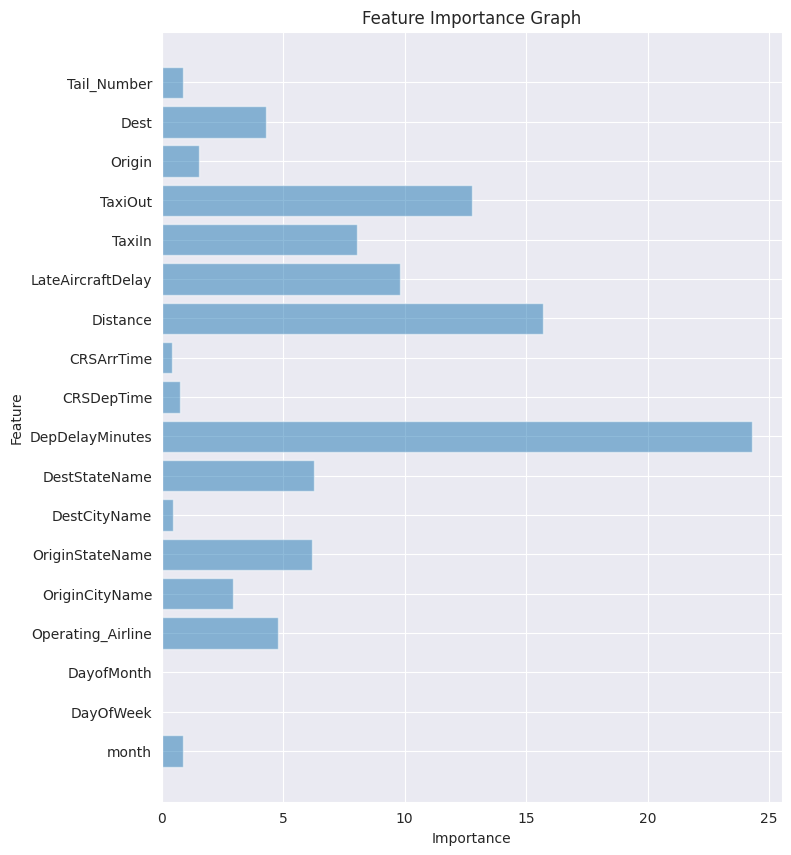

In [45]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = cat_model.get_feature_importance()
objects = cat_model.feature_names_
y_pos = np.arange(len(objects))
performance = feature_importance

plt.figure(figsize=(8, 10))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_matrix, labels):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    # Turn off the grid lines
    plt.grid(False)

    fmt = 'd'
    thresh = conf_matrix.max() / 2
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt), ha="center",
                     va="center", color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show True Positive, True Negative, False Positive, and False Negative combinations
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    offset = 0.4  # Adjust this offset value as needed

    plt.text(0, 0 + offset, f'TN', ha="center", va="bottom", color="black")
    plt.text(1, 1 + offset, f'TP', ha="center", va="bottom", color="black")
    plt.text(0, 1 + offset, f'FP', ha="center", va="bottom", color="black")
    plt.text(1, 0 + offset, f'FN', ha="center", va="bottom", color="black")

class_labels = ['On Time', 'Delayed']

In [47]:
cnf_mat_cat= confusion_matrix(y_test, y_pred)
cnf_mat_cat

array([[786578,  39694],
       [ 15289, 194906]])

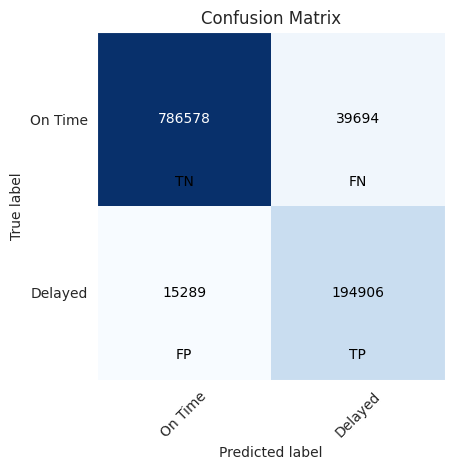

In [48]:
plot_confusion_matrix(cnf_mat_cat,class_labels)
plt.show()

In [49]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0.0,786578,39694,826272
1.0,15289,194906,210195
All,801867,234600,1036467


In [50]:
## Import the library and functions you need
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
## Accuracy
accuracy_score(y_test,y_pred)

0.946951518958153

In [51]:
## Precision
precision_score(y_test,y_pred)

0.8308013640238704

In [52]:
## Recall
recall_score(y_test,y_pred)

0.9272627797997098

In [53]:
## F1 Score
f1_score(y_test,y_pred)

0.8763857507391046